In [1]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from utils import plot_images
from image_datasets import load_nist_data


## Perturbed Binirezed MNIST 

We first define the reference sample as binarized MNIST (with binarization threshold of 0.5)

We now define the following perturbations:
- Pepper MNIST with binarizing thresholds different than 0.5 
- Gaussian noise 
- Gaussian Blurr
- Swirl deformation

We will later compute the FID between these datasets and the reference Pepper MNIST (binerized threshold=0.5) 

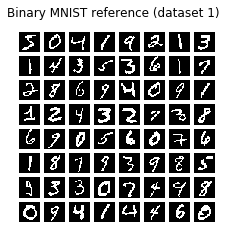

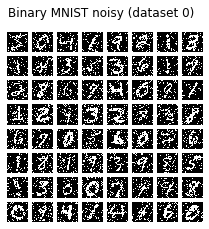

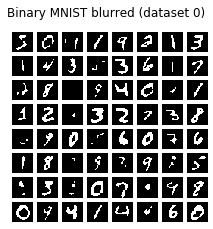

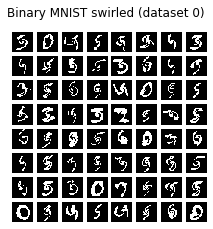

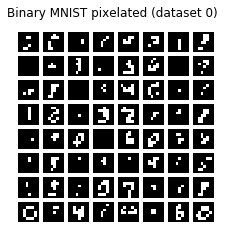

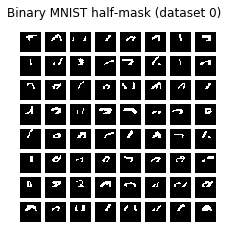

In [12]:
cmap='bone'

#...Reference dfataset:

data = load_nist_data(name='BinaryMNIST')
dataloader = DataLoader(data, batch_size=64, shuffle=False)
images, _ = next(iter(dataloader))
plot_images(images, "Binary MNIST reference (dataset 1)", figsize=(3.5, 3.5), cmap=cmap)

#...Distorted datasets:

# data = load_nist_data(name='BinaryMNIST', distortion='binerize', level=0.1)
# dataloader = DataLoader(data, batch_size=64, shuffle=False)
# images, _ = next(iter(dataloader))
# plot_images(images, "Binaryr MNIST binerize=0.1", figsize=(3.5, 3.5), cmap=cmap)

# data = load_nist_data(name='BinaryMNIST', distortion='binerize', level=0.9)
# dataloader = DataLoader(data, batch_size=64, shuffle=False)
# images, _ = next(iter(dataloader))
# plot_images(images, "Binary MNIST binerize=0.9", figsize=(3.5, 3.5), cmap=cmap)

data = load_nist_data(name='BinaryMNIST', distortion='noise', level=0.4)
dataloader = DataLoader(data, batch_size=64, shuffle=False)
images, _ = next(iter(dataloader))
plot_images(images, "Binary MNIST noisy (dataset 0)", figsize=(3.5, 3.5), cmap=cmap)

# data = load_nist_data(name='BinaryMNIST', distortion='blur', level=1.3)
# dataloader = DataLoader(data, batch_size=64, shuffle=False)
# images, _ = next(iter(dataloader))
# plot_images(images, "Binary MNIST blurred (dataset 0)", figsize=(3.5, 3.5), cmap=cmap)

data = load_nist_data(name='BinaryMNIST', distortion='swirl', level=5)
dataloader = DataLoader(data, batch_size=64, shuffle=False)
images, _ = next(iter(dataloader))
plot_images(images, "Binary MNIST swirled (dataset 0)", figsize=(3.5, 3.5), cmap=cmap)

data = load_nist_data(name='BinaryMNIST', distortion='pixelize', level=0.7)
dataloader = DataLoader(data, batch_size=64, shuffle=False)
images, _ = next(iter(dataloader))
plot_images(images, "Binary MNIST pixelated (dataset 0)", figsize=(3.5, 3.5), cmap=cmap)

# data = load_nist_data(name='BinaryMNIST', distortion='crop', level=0.55)
# dataloader = DataLoader(data, batch_size=64, shuffle=False)
# images, _ = next(iter(dataloader))
# plot_images(images, "Binary MNIST cropped (dataset 0)", figsize=(3.5, 3.5), cmap=cmap)

data = load_nist_data(name='BinaryMNIST', distortion='half_mask')
dataloader = DataLoader(data, batch_size=64, shuffle=False)
images, _ = next(iter(dataloader))
plot_images(images, "Binary MNIST half-mask (dataset 0)", figsize=(3.5, 3.5), cmap=cmap)

# data = load_nist_data(name='BinaryMNIST', distortion='half_noisy', level=5)
# dataloader = DataLoader(data, batch_size=64, shuffle=False)
# images, _ = next(iter(dataloader))
# plot_images(images, "Binary MNIST half-noisy (dataset 0)", figsize=(3.5, 3.5), cmap=cmap)

# data = load_nist_data(name='BinaryMNIST', distortion='half_pure_noise', level=5)
# dataloader = DataLoader(data, batch_size=64, shuffle=False)
# images, _ = next(iter(dataloader))
# plot_images(images, "Binary MNIST half pure noise  (dataset 0)", figsize=(3.5, 3.5), cmap=cmap)

##  LeNet-5 classifier for MNIST & Binary-MNIST
We load two pre-trained LeNet-5 classifiers and evaluate them on the Reference MNIST datasets to extract the mean and std of the features of intermediate layers. We look into two cases: 1) The standard MNIST dataset and 2) the "Pepper" or binarized MNIST dataset.

The trained LeNet-5 classifiers have classification accuracies above 98%.

1) MNIST classifier

In [3]:
import torch
from architectures import LeNet5
from fid_metric import compute_activation_statistics

device = 'cuda:0'
model = LeNet5(num_classes=10)
model.load_state_dict(torch.load('models/LeNet5_MNIST.pth'))
model.eval()

#...Load MNIST test dataset

test_ref = load_nist_data(name='MNIST', train=False)

#...compute mean and std of features from reference data for each layer:

mu_1, sigma_1 = compute_activation_statistics(model, test_ref, activation_layer='fc1', device=device)
mu_2, sigma_2 = compute_activation_statistics(model, test_ref, activation_layer='fc2', device=device)
mu_3, sigma_3 = compute_activation_statistics(model, test_ref, activation_layer='fc3', device=device)

In [4]:
from fid_metric import compute_fid

data = load_nist_data(name='MNIST',  train=False, distortion='binerize', level=0.5)
fid_1 = compute_fid(model, data, mu_ref=mu_1, sigma_ref=sigma_1, activation_layer='fc1', device=device)
fid_2 = compute_fid(model, data, mu_ref=mu_2, sigma_ref=sigma_2, activation_layer='fc2', device=device)
fid_3 = compute_fid(model, data, mu_ref=mu_3, sigma_ref=sigma_3, activation_layer='fc3', device=device)

print('binerize:    fid layer 1 = {}    fid layer 2 = {}    fid layer 3 = {}'.format(fid_1, fid_2, fid_3))

data = load_nist_data(name='MNIST', train=False, distortion='noise', level=0.25)
fid_1 = compute_fid(model, data, mu_ref=mu_1, sigma_ref=sigma_1, activation_layer='fc1', device=device)
fid_2 = compute_fid(model, data, mu_ref=mu_2, sigma_ref=sigma_2, activation_layer='fc2', device=device)
fid_3 = compute_fid(model, data, mu_ref=mu_3, sigma_ref=sigma_3, activation_layer='fc3', device=device)

print('gaussian noise:    fid layer 1 = {}    fid layer 2 = {}    fid layer 3 = {}'.format(fid_1, fid_2, fid_3))

data = load_nist_data(name='MNIST', train=False, distortion='blur', level=1.25)
fid_1 = compute_fid(model, data, mu_ref=mu_1, sigma_ref=sigma_1, activation_layer='fc1', device=device)
fid_2 = compute_fid(model, data, mu_ref=mu_2, sigma_ref=sigma_2, activation_layer='fc2', device=device)
fid_3 = compute_fid(model, data, mu_ref=mu_3, sigma_ref=sigma_3, activation_layer='fc3', device=device)

print('gaussian blur:    fid layer 1 = {}    fid layer 2 = {}    fid layer 3 = {}'.format(fid_1, fid_2, fid_3))

data = load_nist_data(name='MNIST', train=False, distortion='swirl', level=3)
fid_1 = compute_fid(model, data, mu_ref=mu_1, sigma_ref=sigma_1, activation_layer='fc1', device=device)
fid_2 = compute_fid(model, data, mu_ref=mu_2, sigma_ref=sigma_2, activation_layer='fc2', device=device)
fid_3 = compute_fid(model, data, mu_ref=mu_3, sigma_ref=sigma_3, activation_layer='fc3', device=device)

print('swirl:    fid layer 1 = {}    fid layer 2 = {}    fid layer 3 = {}'.format(fid_1, fid_2, fid_3))

data = load_nist_data(name='MNIST', train=False, distortion='pixelize', level=0.5)
fid_1 = compute_fid(model, data, mu_ref=mu_1, sigma_ref=sigma_1, activation_layer='fc1', device=device)
fid_2 = compute_fid(model, data, mu_ref=mu_2, sigma_ref=sigma_2, activation_layer='fc2', device=device)
fid_3 = compute_fid(model, data, mu_ref=mu_3, sigma_ref=sigma_3, activation_layer='fc3', device=device)

print('pixelize:    fid layer 1 = {}    fid layer 2 = {}    fid layer 3 = {}'.format(fid_1, fid_2, fid_3))

data = load_nist_data(name='MNIST', train=False, distortion='crop', level=0.55)
fid_1 = compute_fid(model, data, mu_ref=mu_1, sigma_ref=sigma_1, activation_layer='fc1', device=device)
fid_2 = compute_fid(model, data, mu_ref=mu_2, sigma_ref=sigma_2, activation_layer='fc2', device=device)
fid_3 = compute_fid(model, data, mu_ref=mu_3, sigma_ref=sigma_3, activation_layer='fc3', device=device)

print('crop:   fid layer 1 = {}    fid layer 2 = {}    fid layer 3 = {}'.format(fid_1, fid_2, fid_3))


binerize:    fid layer 1 = 2.825329542160034    fid layer 2 = 4.42305326461792    fid layer 3 = 1.986130952835083
gaussian noise:    fid layer 1 = 3.7916994094848633    fid layer 2 = 4.483862400054932    fid layer 3 = 2.843257188796997
gaussian blur:    fid layer 1 = 83.585693359375    fid layer 2 = 137.67227172851562    fid layer 3 = 65.88740539550781
swirl:    fid layer 1 = 44.86949920654297    fid layer 2 = 78.24354553222656    fid layer 3 = 58.88196563720703
pixelize:    fid layer 1 = 50.42639923095703    fid layer 2 = 83.87415313720703    fid layer 3 = 40.24601745605469
crop:   fid layer 1 = 80.99642181396484    fid layer 2 = 125.34374237060547    fid layer 3 = 73.65481567382812


2) Binary MNIST classifier

In [10]:
import torch
from architectures import LeNet5
from fid_metric import compute_activation_statistics

model_bin = LeNet5()
model_bin.load_state_dict(torch.load('models/LeNet5_BinaryMNIST.pth'))
model_bin.eval()

#...Load MNIST test dataset

test_ref = load_nist_data(name='BinaryMNIST', train=False)

#...compute mean and std of features from reference data for each layer:

mu_bin_1, sigma_bin_1 = compute_activation_statistics(model_bin, test_ref, activation_layer='fc1', device=device)
mu_bin_2, sigma_bin_2 = compute_activation_statistics(model_bin, test_ref, activation_layer='fc1', device=device)
mu_bin_3, sigma_bin_3 = compute_activation_statistics(model_bin, test_ref, activation_layer='fc1', device=device)

## FID Experiments with LeNet-5

Below we compute the FID metric between the reference MNIST data and various distortion levels.
For the classifier we used the LeNet-5 architecture as above. We show that the FID computed from 
features in the second layer has a better separation power than the featuires extracted from
the first and third layers accross all considered deformation. 

### 1. Binarized

dataset: MNIST

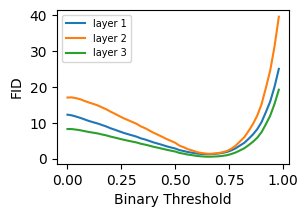

In [3]:
import numpy as np
from fid_metric import fid_distorted_NIST

fid_1 = fid_distorted_NIST(model, name='MNIST', distortion='binerize', values=np.arange(0.0, 1.0, 0.02), activation_layer='fc1', device=device)
fid_2 = fid_distorted_NIST(model, name='MNIST', distortion='binerize', values=np.arange(0.0, 1.0, 0.02), activation_layer='fc2', device=device)
fid_3 = fid_distorted_NIST(model, name='MNIST', distortion='binerize', values=np.arange(0.0, 1.0, 0.02), activation_layer='fc3', device=device)

fig, ax = plt.subplots(1,1, figsize=(3,2))
plt.plot(fid_1.keys(), fid_1.values(), label='layer 1')
plt.plot(fid_2.keys(), fid_2.values(), label='layer 2')
plt.plot(fid_3.keys(), fid_3.values(), label='layer 3')
plt.ylabel('FID')
plt.xlabel('Binary Threshold')
plt.legend(loc='upper left', fontsize=7)
plt.show()

Binary MNIST:

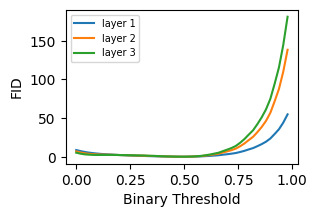

In [11]:
import numpy as np
from fid_metric import fid_distorted_NIST

fid_1 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='binerize', values=np.arange(0.0, 1.0, 0.02), activation_layer='fc1', device=device)
fid_2 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='binerize', values=np.arange(0.0, 1.0, 0.02), activation_layer='fc2', device=device)
fid_3 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='binerize', values=np.arange(0.0, 1.0, 0.02), activation_layer='fc3', device=device)

fig, ax = plt.subplots(1,1, figsize=(3,2))
plt.plot(fid_1.keys(), fid_1.values(), label='layer 1')
plt.plot(fid_2.keys(), fid_2.values(), label='layer 2')
plt.plot(fid_3.keys(), fid_3.values(), label='layer 3')
plt.ylabel('FID')
plt.xlabel('Binary Threshold')
plt.legend(loc='upper left', fontsize=7)
plt.show()

### 2. Gaussian noise

MNIST:

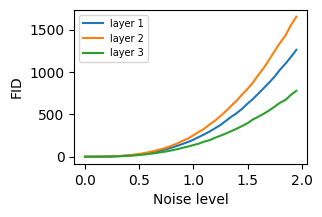

In [7]:
import numpy as np
from fid_metric import fid_distorted_NIST

fid_1 = fid_distorted_NIST(model, name='MNIST', distortion='noise', values=np.arange(0.0, 2, 0.05), activation_layer='fc1', device=device)
fid_2 = fid_distorted_NIST(model, name='MNIST', distortion='noise', values=np.arange(0.0, 2, 0.05), activation_layer='fc2', device=device)
fid_3 = fid_distorted_NIST(model, name='MNIST', distortion='noise', values=np.arange(0.0, 2, 0.05), activation_layer='fc3', device=device)

fig, ax = plt.subplots(1,1, figsize=(3,2))
plt.plot(fid_1.keys(), fid_1.values(), label='layer 1')
plt.plot(fid_2.keys(), fid_2.values(), label='layer 2')
plt.plot(fid_3.keys(), fid_3.values(), label='layer 3')
plt.ylabel('FID')
plt.xlabel('Noise level')
plt.legend(loc='upper left', fontsize=7)
plt.show()

Binary MNIST:

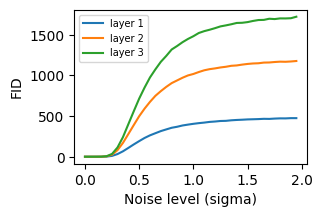

In [12]:
import numpy as np
from fid_metric import fid_distorted_NIST

fid_1 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='noise', values=np.arange(0.0, 2, 0.05), activation_layer='fc1', device=device)
fid_2 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='noise', values=np.arange(0.0, 2, 0.05), activation_layer='fc2', device=device)
fid_3 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='noise', values=np.arange(0.0, 2, 0.05), activation_layer='fc3', device=device)

fig, ax = plt.subplots(1,1, figsize=(3,2))
plt.plot(fid_1.keys(), fid_1.values(), label='layer 1')
plt.plot(fid_2.keys(), fid_2.values(), label='layer 2')
plt.plot(fid_3.keys(), fid_3.values(), label='layer 3')
plt.ylabel('FID')
plt.xlabel('Noise level (sigma)')
plt.legend(loc='upper left', fontsize=7)
plt.show()

### 3. Gaussian blur

MNIST:

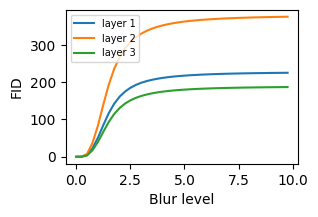

In [8]:
import numpy as np
from fid_metric import fid_distorted_NIST

fid_1 = fid_distorted_NIST(model, name='MNIST', distortion='blur', values=np.arange(0.01, 10, 0.25), activation_layer='fc1', device=device)
fid_2 = fid_distorted_NIST(model, name='MNIST', distortion='blur', values=np.arange(0.01, 10, 0.25), activation_layer='fc2', device=device)
fid_3 = fid_distorted_NIST(model, name='MNIST', distortion='blur', values=np.arange(0.01, 10, 0.25), activation_layer='fc3', device=device)

fig, ax = plt.subplots(1,1, figsize=(3,2))
plt.plot(fid_1.keys(), fid_1.values(), label='layer 1')
plt.plot(fid_2.keys(), fid_2.values(), label='layer 2')
plt.plot(fid_3.keys(), fid_3.values(), label='layer 3')
plt.ylabel('FID')
plt.xlabel('Blur level')
plt.legend(loc='upper left', fontsize=7)
plt.show()

Binary MNIST:

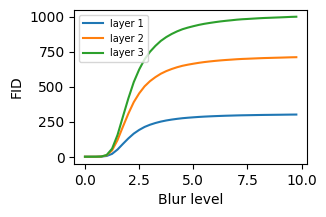

In [13]:
import numpy as np
from fid_metric import fid_distorted_NIST

fid_1 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='blur', values=np.arange(0.01, 10, 0.25), activation_layer='fc1', device=device)
fid_2 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='blur', values=np.arange(0.01, 10, 0.25), activation_layer='fc2', device=device)
fid_3 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='blur', values=np.arange(0.01, 10, 0.25), activation_layer='fc3', device=device)

fig, ax = plt.subplots(1,1, figsize=(3,2))
plt.plot(fid_1.keys(), fid_1.values(), label='layer 1')
plt.plot(fid_2.keys(), fid_2.values(), label='layer 2')
plt.plot(fid_3.keys(), fid_3.values(), label='layer 3')
plt.ylabel('FID')
plt.xlabel('Blur level')
plt.legend(loc='upper left', fontsize=7)
plt.show()

### 4. Swirl deformation

MNIST:

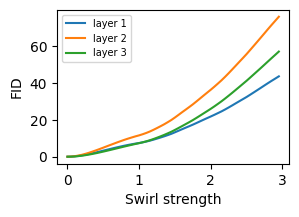

In [9]:
import numpy as np
from fid_metric import fid_distorted_NIST

fid_1 = fid_distorted_NIST(model, name='MNIST', distortion='swirl', values=np.arange(0, 3, 0.05), activation_layer='fc1', device=device)
fid_2 = fid_distorted_NIST(model, name='MNIST', distortion='swirl', values=np.arange(0, 3, 0.05), activation_layer='fc2', device=device)
fid_3 = fid_distorted_NIST(model, name='MNIST', distortion='swirl', values=np.arange(0, 3, 0.05), activation_layer='fc3', device=device)

fig, ax = plt.subplots(1,1, figsize=(3,2))
plt.plot(fid_1.keys(), fid_1.values(), label='layer 1')
plt.plot(fid_2.keys(), fid_2.values(), label='layer 2')
plt.plot(fid_3.keys(), fid_3.values(), label='layer 3')
plt.ylabel('FID')
plt.xlabel('Swirl strength')
plt.legend(loc='upper left', fontsize=7)
plt.show()

Binary MNIST:

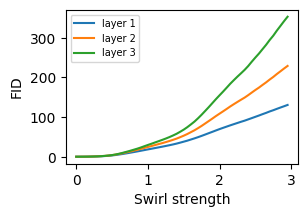

In [14]:
import numpy as np
from fid_metric import fid_distorted_NIST

fid_1 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='swirl', values=np.arange(0, 3, 0.05), activation_layer='fc1', device=device)
fid_2 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='swirl', values=np.arange(0, 3, 0.05), activation_layer='fc2', device=device)
fid_3 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='swirl', values=np.arange(0, 3, 0.05), activation_layer='fc3', device=device)

fig, ax = plt.subplots(1,1, figsize=(3,2))
plt.plot(fid_1.keys(), fid_1.values(), label='layer 1')
plt.plot(fid_2.keys(), fid_2.values(), label='layer 2')
plt.plot(fid_3.keys(), fid_3.values(), label='layer 3')
plt.ylabel('FID')
plt.xlabel('Swirl strength')
plt.legend(loc='upper left', fontsize=7)
plt.show()

### 5. Pixelization

MNIST:

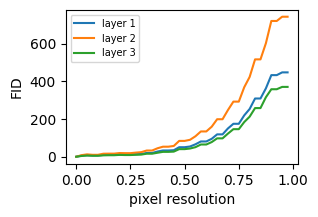

In [15]:
import numpy as np
from fid_metric import fid_distorted_NIST

fid_1 = fid_distorted_NIST(model, name='MNIST', distortion='pixelize', values=np.arange(0, 1, 0.025), activation_layer='fc1', device=device)
fid_2 = fid_distorted_NIST(model, name='MNIST', distortion='pixelize', values=np.arange(0, 1, 0.025), activation_layer='fc2', device=device)
fid_3 = fid_distorted_NIST(model, name='MNIST', distortion='pixelize', values=np.arange(0, 1, 0.025), activation_layer='fc3', device=device)

fig, ax = plt.subplots(1,1, figsize=(3,2))
plt.plot(fid_1.keys(), fid_1.values(), label='layer 1')
plt.plot(fid_2.keys(), fid_2.values(), label='layer 2')
plt.plot(fid_3.keys(), fid_3.values(), label='layer 3')
plt.ylabel('FID')
plt.xlabel('pixel resolution')
plt.legend(loc='upper left', fontsize=7)
plt.show()

Binary MNIST:

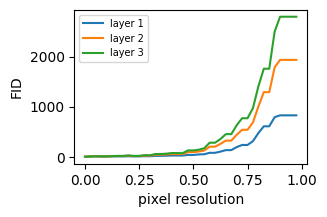

In [17]:
import numpy as np
from fid_metric import fid_distorted_NIST

fid_1 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='pixelize', values=np.arange(0, 1, 0.025), activation_layer='fc1', device=device)
fid_2 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='pixelize', values=np.arange(0, 1, 0.025), activation_layer='fc2', device=device)
fid_3 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='pixelize', values=np.arange(0, 1, 0.025), activation_layer='fc3', device=device)

fig, ax = plt.subplots(1,1, figsize=(3,2))
plt.plot(fid_1.keys(), fid_1.values(), label='layer 1')
plt.plot(fid_2.keys(), fid_2.values(), label='layer 2')
plt.plot(fid_3.keys(), fid_3.values(), label='layer 3')
plt.ylabel('FID')
plt.xlabel('pixel resolution')
plt.legend(loc='upper left', fontsize=7)
plt.show()

### 6. Crop image

MNIST:

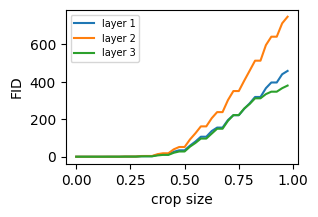

In [18]:
import numpy as np
from fid_metric import fid_distorted_NIST

fid_1 = fid_distorted_NIST(model, name='MNIST', distortion='crop', values=np.arange(0, 1, 0.025), activation_layer='fc1', device=device)
fid_2 = fid_distorted_NIST(model, name='MNIST', distortion='crop', values=np.arange(0, 1, 0.025), activation_layer='fc2', device=device)
fid_3 = fid_distorted_NIST(model, name='MNIST', distortion='crop', values=np.arange(0, 1, 0.025), activation_layer='fc3', device=device)

fig, ax = plt.subplots(1,1, figsize=(3,2))
plt.plot(fid_1.keys(), fid_1.values(), label='layer 1')
plt.plot(fid_2.keys(), fid_2.values(), label='layer 2')
plt.plot(fid_3.keys(), fid_3.values(), label='layer 3')
plt.ylabel('FID')
plt.xlabel('crop size')
plt.legend(loc='upper left', fontsize=7)
plt.show()

Binary MNIST:

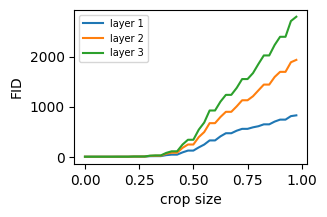

In [21]:
import numpy as np
from fid_metric import fid_distorted_NIST

fid_1 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='crop', values=np.arange(0, 1, 0.025), activation_layer='fc1', device=device)
fid_2 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='crop', values=np.arange(0, 1, 0.025), activation_layer='fc2', device=device)
fid_3 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='crop', values=np.arange(0, 1, 0.025), activation_layer='fc3', device=device)

fig, ax = plt.subplots(1,1, figsize=(3,2))
plt.plot(fid_1.keys(), fid_1.values(), label='layer 1')
plt.plot(fid_2.keys(), fid_2.values(), label='layer 2')
plt.plot(fid_3.keys(), fid_3.values(), label='layer 3')
plt.ylabel('FID')
plt.xlabel('crop size')
plt.legend(loc='upper left', fontsize=7)
plt.show()

## FID Experiments with ResNet-18

In [2]:
import torch
from architectures import ResNet18
from fid_metric import compute_activation_statistics

device = 'cuda:0'

model_bin = ResNet18(num_classes=10)
model_bin.load_state_dict(torch.load('models/ResNet18_BinaryMNIST.pth'))
model_bin.eval()

#...Load MNIST test dataset

test_ref = load_nist_data(name='BinaryMNIST', train=False)

#...compute mean and std of features from reference data for each layer:

mu_bin_1, sigma_bin_1 = compute_activation_statistics(model_bin, test_ref, activation_layer='layer1', device=device)
mu_bin_2, sigma_bin_2 = compute_activation_statistics(model_bin, test_ref, activation_layer='layer2', device=device)
mu_bin_3, sigma_bin_3 = compute_activation_statistics(model_bin, test_ref, activation_layer='layer3', device=device)
mu_bin_4, sigma_bin_4 = compute_activation_statistics(model_bin, test_ref, activation_layer='AvgPool4', device=device)

### 1. Binarize

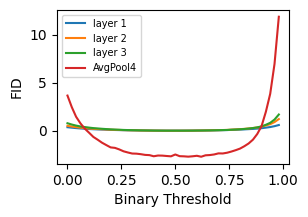

In [5]:
import numpy as np
from fid_metric import fid_distorted_NIST

fid_1 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='binerize', values=np.arange(0.0, 1.0, 0.02), activation_layer='layer1', device=device)
fid_2 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='binerize', values=np.arange(0.0, 1.0, 0.02), activation_layer='layer2', device=device)
fid_3 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='binerize', values=np.arange(0.0, 1.0, 0.02), activation_layer='layer3', device=device)
fid_4 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='binerize', values=np.arange(0.0, 1.0, 0.02), activation_layer='AvgPool4', device=device)

fig, ax = plt.subplots(1,1, figsize=(3,2))
plt.plot(fid_1.keys(), fid_1.values(), label='layer 1')
plt.plot(fid_2.keys(), fid_2.values(), label='layer 2')
plt.plot(fid_3.keys(), fid_3.values(), label='layer 3')
plt.plot(fid_4.keys(), fid_4.values(), label='AvgPool4')
plt.ylabel('FID')
plt.xlabel('Binary Threshold')
plt.legend(loc='upper left', fontsize=7)
plt.show()

### 2. Gaussian noise

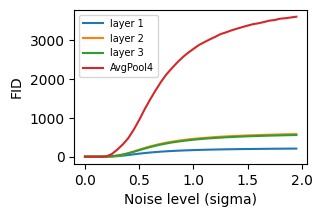

In [4]:
import numpy as np
from fid_metric import fid_distorted_NIST

fid_1 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='noise', values=np.arange(0.0, 2, 0.05), activation_layer='layer1', device=device)
fid_2 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='noise', values=np.arange(0.0, 2, 0.05), activation_layer='layer2', device=device)
fid_3 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='noise', values=np.arange(0.0, 2, 0.05), activation_layer='layer3', device=device)
fid_4 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='noise', values=np.arange(0.0, 2, 0.05), activation_layer='AvgPool4', device=device)

fig, ax = plt.subplots(1,1, figsize=(3,2))
plt.plot(fid_1.keys(), fid_1.values(), label='layer 1')
plt.plot(fid_2.keys(), fid_2.values(), label='layer 2')
plt.plot(fid_3.keys(), fid_3.values(), label='layer 3')
plt.plot(fid_4.keys(), fid_4.values(), label='AvgPool4')
plt.ylabel('FID')
plt.xlabel('Noise level (sigma)')
plt.legend(loc='upper left', fontsize=7)
plt.show()

### 3. Pixelize

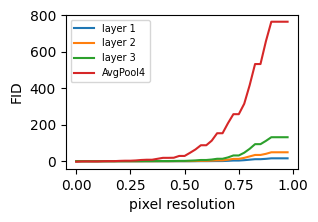

In [6]:
import numpy as np
from fid_metric import fid_distorted_NIST

fid_1 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='pixelize', values=np.arange(0, 1, 0.025), activation_layer='layer1', device=device)
fid_2 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='pixelize', values=np.arange(0, 1, 0.025), activation_layer='layer2', device=device)
fid_3 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='pixelize', values=np.arange(0, 1, 0.025), activation_layer='layer3', device=device)
fid_4 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='pixelize', values=np.arange(0, 1, 0.025), activation_layer='AvgPool4', device=device)

fig, ax = plt.subplots(1,1, figsize=(3,2))
plt.plot(fid_1.keys(), fid_1.values(), label='layer 1')
plt.plot(fid_2.keys(), fid_2.values(), label='layer 2')
plt.plot(fid_3.keys(), fid_3.values(), label='layer 3')
plt.plot(fid_4.keys(), fid_4.values(), label='AvgPool4')
plt.ylabel('FID')
plt.xlabel('pixel resolution')
plt.legend(loc='upper left', fontsize=7)
plt.show()

## FID Experiments with ResNet-34

In [3]:
import torch
from architectures import ResNet34
from fid_metric import compute_activation_statistics

device = 'cuda:0'

model_bin = ResNet34(num_classes=10)
model_bin.load_state_dict(torch.load('models/ResNet34_BinaryMNIST.pth'))
model_bin.eval()

#...Load MNIST test dataset

test_ref = load_nist_data(name='BinaryMNIST', train=False)

#...compute mean and std of features from reference data for each layer:

mu_bin_1, sigma_bin_1 = compute_activation_statistics(model_bin, test_ref, activation_layer='layer1', device=device)
mu_bin_2, sigma_bin_2 = compute_activation_statistics(model_bin, test_ref, activation_layer='layer2', device=device)
mu_bin_3, sigma_bin_3 = compute_activation_statistics(model_bin, test_ref, activation_layer='layer3', device=device)
mu_bin_4, sigma_bin_4 = compute_activation_statistics(model_bin, test_ref, activation_layer='AvgPool4', device=device)

### 1. Binirize

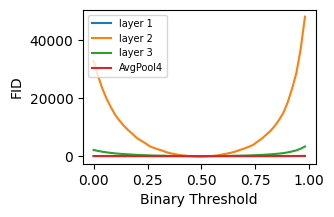

In [4]:
import numpy as np
from fid_metric import fid_distorted_NIST

fid_1 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='binerize', values=np.arange(0.0, 1.0, 0.02), activation_layer='layer1', device=device)
fid_2 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='binerize', values=np.arange(0.0, 1.0, 0.02), activation_layer='layer2', device=device)
fid_3 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='binerize', values=np.arange(0.0, 1.0, 0.02), activation_layer='layer3', device=device)
fid_4 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='binerize', values=np.arange(0.0, 1.0, 0.02), activation_layer='AvgPool4', device=device)

fig, ax = plt.subplots(1,1, figsize=(3,2))
plt.plot(fid_1.keys(), fid_1.values(), label='layer 1')
plt.plot(fid_2.keys(), fid_2.values(), label='layer 2')
plt.plot(fid_3.keys(), fid_3.values(), label='layer 3')
plt.plot(fid_4.keys(), fid_4.values(), label='AvgPool4')
plt.ylabel('FID')
plt.xlabel('Binary Threshold')
plt.legend(loc='upper left', fontsize=7)
plt.show()

### 2. Gaussian noise

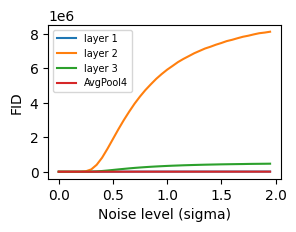

In [5]:
import numpy as np
from fid_metric import fid_distorted_NIST

fid_1 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='noise', values=np.arange(0.0, 2, 0.05), activation_layer='layer1', device=device)
fid_2 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='noise', values=np.arange(0.0, 2, 0.05), activation_layer='layer2', device=device)
fid_3 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='noise', values=np.arange(0.0, 2, 0.05), activation_layer='layer3', device=device)
fid_4 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='noise', values=np.arange(0.0, 2, 0.05), activation_layer='AvgPool4', device=device)

fig, ax = plt.subplots(1,1, figsize=(3,2))
plt.plot(fid_1.keys(), fid_1.values(), label='layer 1')
plt.plot(fid_2.keys(), fid_2.values(), label='layer 2')
plt.plot(fid_3.keys(), fid_3.values(), label='layer 3')
plt.plot(fid_4.keys(), fid_4.values(), label='AvgPool4')
plt.ylabel('FID')
plt.xlabel('Noise level (sigma)')
plt.legend(loc='upper left', fontsize=7)
plt.show()

### 3. Pixelize

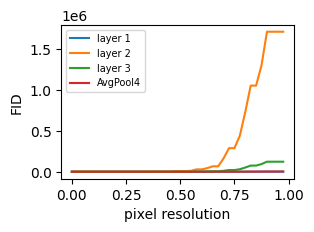

In [6]:
import numpy as np
from fid_metric import fid_distorted_NIST

fid_1 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='pixelize', values=np.arange(0, 1, 0.025), activation_layer='layer1', device=device)
fid_2 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='pixelize', values=np.arange(0, 1, 0.025), activation_layer='layer2', device=device)
fid_3 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='pixelize', values=np.arange(0, 1, 0.025), activation_layer='layer3', device=device)
fid_4 = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='pixelize', values=np.arange(0, 1, 0.025), activation_layer='AvgPool4', device=device)

fig, ax = plt.subplots(1,1, figsize=(3,2))
plt.plot(fid_1.keys(), fid_1.values(), label='layer 1')
plt.plot(fid_2.keys(), fid_2.values(), label='layer 2')
plt.plot(fid_3.keys(), fid_3.values(), label='layer 3')
plt.plot(fid_4.keys(), fid_4.values(), label='AvgPool4')
plt.ylabel('FID')
plt.xlabel('pixel resolution')
plt.legend(loc='upper left', fontsize=7)
plt.show()